In [1]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("smsspamcollection/SMSSpamCollection", sep="\t", names=['label', 'messages'])

In [3]:
df.head(10)

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.isnull().sum()

label       0
messages    0
dtype: int64

In [5]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df.shape

(5572, 2)

In [7]:
# Check duplicate rows
duplicate  = df[df.duplicated('messages')]
duplicate

,label,messages
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [8]:
duplicate.shape

(403, 2)

In [9]:
df2 = df.drop_duplicates('messages')
df2.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df2.reset_index(inplace=True, drop=True)

In [11]:
# Check duplicate rows
duplicate2  = df2[df2.duplicated('messages')]
duplicate2

,label,messages


In [12]:
duplicate2.value_counts()

Series([], dtype: int64)

In [13]:
print("With duplicate value shape: ",df.shape)
print("Without duplicate value shape: ",df2.shape)

With duplicate value shape:  (5572, 2)
Without duplicate value shape:  (5169, 2)


c:\users\alami\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


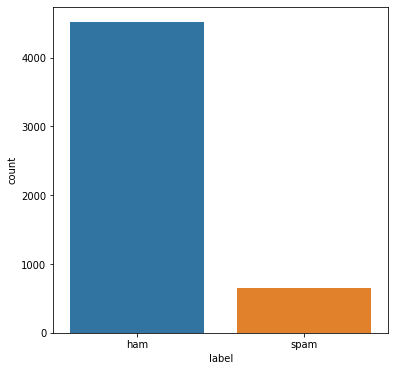

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(df2['label'])
plt.show()

In [15]:
len(df2)

5169

#### Data cleaning and preprocessing

In [16]:
# For portersetemmer

ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    sentence = re.sub('[^a-zA-Z]', ' ', df2['messages'][i])
    sentence = sentence.lower()
    words = sentence.split()
    words = [ps.stem(word) for word in words if not word in stopwords.words('english')]
    words = ' '.join(words)
    corpus.append(words)

In [17]:
# For WordNetLematizer
lematizer = WordNetLemmatizer()

corpus2 = []
for i in range(0, len(df2)):
    sentence = re.sub('[^a-zA-Z]', ' ', df2['messages'][i])
    sentence = sentence.lower()
    words = sentence.split()
    words = [lematizer.lemmatize(word) for word in words if not word in stopwords.words('english')]
    words = ' '.join(words)
    corpus2.append(words)

In [18]:
# Creating the Bag of Words model for CounterVectorizer

cv = CountVectorizer(max_features=4500) # max_features use for reduce number of columns

x = cv.fit_transform(corpus).toarray()

In [19]:
print(len(cv.get_feature_names()))

4500


In [20]:
y = pd.get_dummies(df2['label'])
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [21]:
y2 = y.iloc[:,1].values

In [22]:
y2

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [23]:
y3 = y.iloc[:,1]
y3

0       0
1       0
2       1
3       0
4       0
       ..
5164    1
5165    0
5166    0
5167    0
5168    0
Name: spam, Length: 5169, dtype: uint8

In [24]:
# Creating the Bag of Words model for TF-IDF 
tf_idf = TfidfVectorizer(max_features=4500)  # max_features use for reduce number of columns
x2 = tf_idf.fit_transform(corpus2).toarray()

In [25]:
print(len(tf_idf.get_feature_names()))

4500


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size=0.25, random_state=1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=0)

In [28]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB

In [29]:
spam_detect_model = MultinomialNB().fit(X=x_train, y=y_train)
spam_detect_model2 = MultinomialNB().fit(X=x_train2, y=y_train2)

In [30]:
y_pred = spam_detect_model.predict(X=x_test)
y_pred2 = spam_detect_model.predict(X=x_test2)

In [31]:
confusion_m = confusion_matrix(y_true=y_test,y_pred=y_pred)

In [32]:
confusion_m

array([[1134,   12],
       [   6,  141]], dtype=int64)

In [33]:
confusion_m2 = confusion_matrix(y_true=y_test2,y_pred=y_pred2)
confusion_m2

array([[1028,  100],
       [ 154,   11]], dtype=int64)

In [34]:
accuracy1 = accuracy_score(y_true=y_test,y_pred=y_pred)
accuracy2 = accuracy_score(y_true=y_test2,y_pred=y_pred2)

In [35]:
accuracy1

0.9860788863109049

In [36]:
accuracy2

0.8035576179427688

In [37]:
spam_detect_model.score(x_test, y_test)

0.9860788863109049

In [38]:
# Test

emails = ['hey, you win an Iphone X giveway for free please click the below link and get it']

In [39]:
cv_emails = cv.transform(emails)

In [41]:
result = spam_detect_model.predict(cv_emails)

In [42]:
result

array([1], dtype=uint8)

In [43]:
result[0]

1

In [44]:
if result[0] == 1:
    print("Spam")
else:
    print("Not Spam")

Spam
